In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Select only relevant columns
data = df[['Annual_Income', 'Spending_Score']]

# Normalize data for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

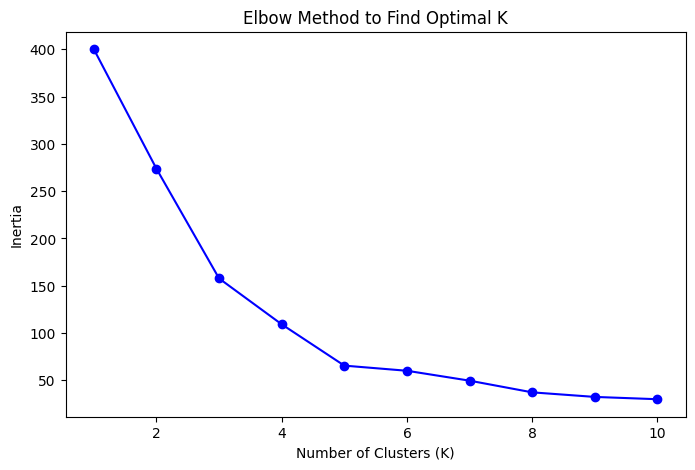

In [10]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

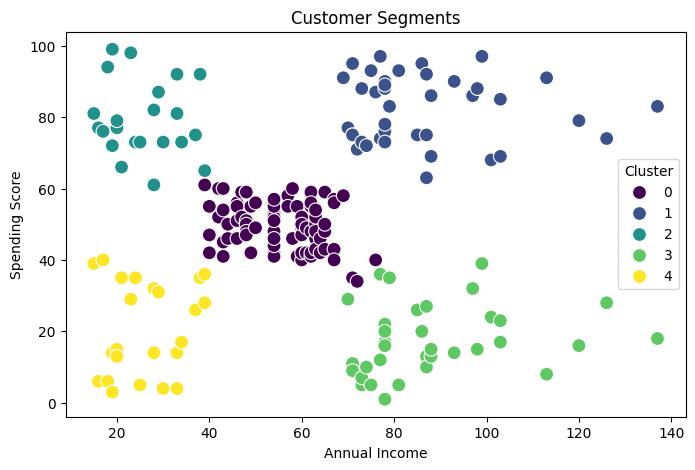

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette="viridis", s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

In [13]:
df.to_csv("Customer_Segments.csv", index=False)